In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)
cgpa = np.round(np.random.uniform(6.0, 10.0, 100), 2)

package = np.round(cgpa * 2 + np.random.normal(0, 1, 100), 2)

data = pd.DataFrame({
    'CGPA': cgpa,
    'Package (LPA)': package
})

# Ensuring no negative packages
data['Package (LPA)'] = data['Package (LPA)'].apply(lambda x: max(x, 0))



In [3]:
data

,CGPA,Package (LPA)
0,7.50,15.09
1,9.80,19.30
2,8.93,17.95
3,8.39,14.79
4,6.62,13.02
...,...,...
95,7.98,15.14
96,8.09,16.10
97,7.71,15.76
98,6.10,12.48


<Axes: xlabel='CGPA', ylabel='Package (LPA)'>

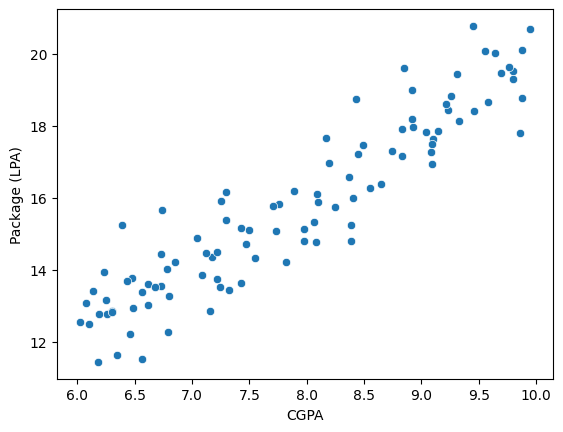

In [4]:
sns.scatterplot(data,x='CGPA',y='Package (LPA)')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data[['CGPA']],data['Package (LPA)'],test_size=0.2,random_state=81)

lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

score = lr.score(X_test,y_test)
score

0.9265127593467578

In [11]:
a=0
for i in range(1,101):
    X_train, X_test, y_train, y_test = train_test_split(data[['CGPA']],data['Package (LPA)'],test_size=0.2,random_state=i)
    lr = linear_model.LinearRegression()
    lr.fit(X_train,y_train)
    bst_score = lr.score(X_test,y_test)
    if score < bst_score:
        score=bst_score
        a = i

In [12]:
score,a

(0.9265127593467578, 0)

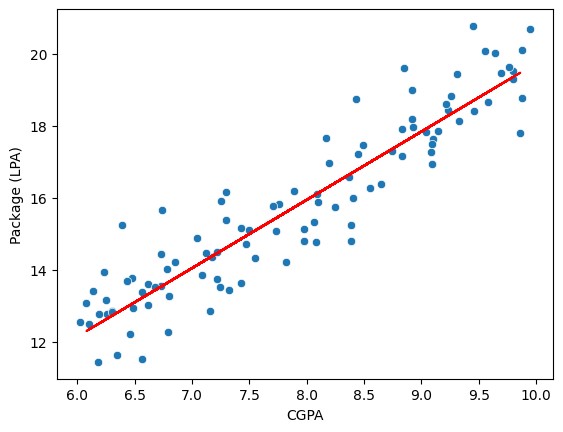

In [13]:
sns.scatterplot(data=data,x='CGPA',y='Package (LPA)')
plt.plot(X_train,lr.predict(X_train),c='r')

In [14]:
lr.coef_,lr.intercept_

(array([1.89683746]), 0.7657504346699984)

In [18]:
x_mean ,y_mean= data.CGPA.mean(),data['Package (LPA)'].mean()
x_mean,y_mean

(7.8805000000000005, 15.7602)

In [19]:
m = ((5.1-x_mean)*(6.7-y_mean))/((5.1-x_mean)**2)

In [20]:
c = y_mean - m * x_mean

In [21]:
m * 5.2 + c

7.025847869088297

In [22]:
numerator = np.sum((5.1 - x_mean) * (6.7 - y_mean))
denominator = np.sum((5.1 - x_mean) ** 2)
m = numerator / denominator


c = y_mean - m * x_mean


def predict(x):
    return m * x + c

In [23]:
predict(5.2)

7.025847869088297

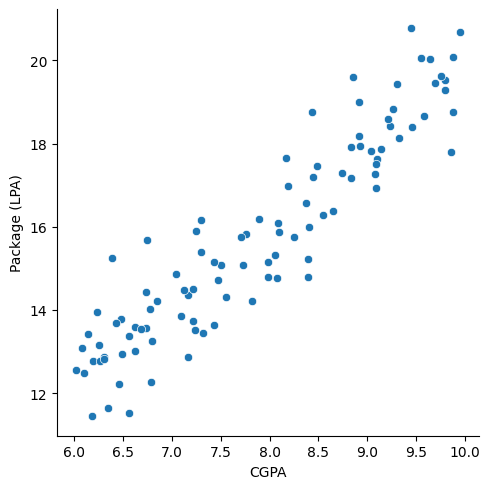

In [33]:
sns.relplot(x='CGPA',y='Package (LPA)',data=data)